# 数据来源
数据从智慧理工大上下载近六年的学校推荐免试攻读硕士学位研究生名单，分别用年份命名。

In [1]:
from whut_postgraduate_recommendation import preliminary_analysis
import pandas as pd
#读取保研人数数据
data = [pd.read_excel(f'../Data/{i}.xls', index_col=0, header=0) for i in range(2017, 2023)]

Importing plotly failed. Interactive plots will not work.


# 数据特征初步分析

In [2]:
pre_analysis = preliminary_analysis(data)

## 数据集大小

In [3]:
pre_analysis.show_size()

(1229, 7)
(1243, 7)
(1237, 7)
(1293, 7)
(1344, 7)
(1423, 7)


数据集大小均为(1200 - 1400, 7),包含7个特征
## 特征类型

In [4]:
pre_analysis.show_col()

Index(['学号', '姓名', '性别', '班级', '学院名称', '类别', '名额类型'], dtype='object')
Index(['学号', '姓名', '性别', '班级', '学院名称', '类别', '名额类型'], dtype='object')
Index(['学号', '姓名', '性别', '班级', '学院名称', '类别', '名额类型'], dtype='object')
Index(['学号', '姓名', '性别', '班级', '学院名称', '类别', '名额类型'], dtype='object')
Index(['学号', '姓名', '性别', '班级', '学院名称', '类别', '名额类型'], dtype='object')
Index(['学号', '姓名', '性别', '班级', '学院名称', '类别', '备注'], dtype='object')


前五年特征类型均为学号, 姓名, 性别, 班级, 学院名称, 类别, 名额类型，2022年特征类型名额类型变为备注
## 查看前五个值
通过查看每个数据前五个值，可以大致了解数据构成

In [5]:
pre_analysis.show_head()

              学号   姓名 性别      班级  学院名称 类别 名额类型
序号                                            
1   121301090935   唐川  男  材化1301  材料学院  A   普通
2   121308890201  王志强  男  材化1301  材料学院  A   普通
3   121301090819  蔡恒辉  男  材科1301  材料学院  A   普通
4   121301091246  陈雪华  女  材科1301  材料学院  A   普通
5   121301090808  王博伦  男  材科1301  材料学院  A   普通
              学号   姓名 性别      班级  学院名称 类别 名额类型
序号                                            
1   121414130250  姬梅梅  女  材化1401  材料学院  A   普通
2   121408720334  毛家威  男  材化1401  材料学院  A   普通
3   121401100123  吴子祎  男  材科1401  材料学院  A   普通
4   121401101101   吴桢  男  材科1401  材料学院  A   普通
5   121410870533  赵慧慧  女  材科1401  材料学院  A   普通
              学号   姓名 性别        班级    学院名称 类别 名额类型
序号                                                
1   121501100512  程用杰  男  材科jd1501  材料示范学院  A   学硕
2   121501101108   管彬  男  材科jd1501  材料示范学院  A   学硕
3   121501100606  郭亚晋  男  材科jd1501  材料示范学院  A   学硕
4   121503930130   胡洋  女  材科jd1501  材料示范学院  A   学硕
5   121501101212  贾铭璞  男  材科jd1501  

## 缺失值

In [6]:
pre_analysis.showna()

学号      0
姓名      0
性别      0
班级      0
学院名称    0
类别      0
名额类型    1
dtype: int64
学号      0
姓名      0
性别      0
班级      0
学院名称    0
类别      0
名额类型    0
dtype: int64
学号      0
姓名      0
性别      0
班级      0
学院名称    0
类别      0
名额类型    0
dtype: int64
学号       0
姓名       0
性别       0
班级       0
学院名称     0
类别      26
名额类型     0
dtype: int64
学号      0
姓名      0
性别      0
班级      0
学院名称    0
类别      0
名额类型    8
dtype: int64
学号        0
姓名        0
性别        0
班级        0
学院名称      0
类别        0
备注      726
dtype: int64


In [7]:
pre_analysis.fillna()

由此可见，该数据集存在缺失值，一般为名额类型，可以使用''空字符串填充缺失值
# 数据可视化分析
## 保研类型比例(饼图 + 线性图 + 柱状图)

In [8]:
from whut_postgraduate_recommendation import postgraduate_recommendation_type
import pylab as plt
prt = postgraduate_recommendation_type(data)

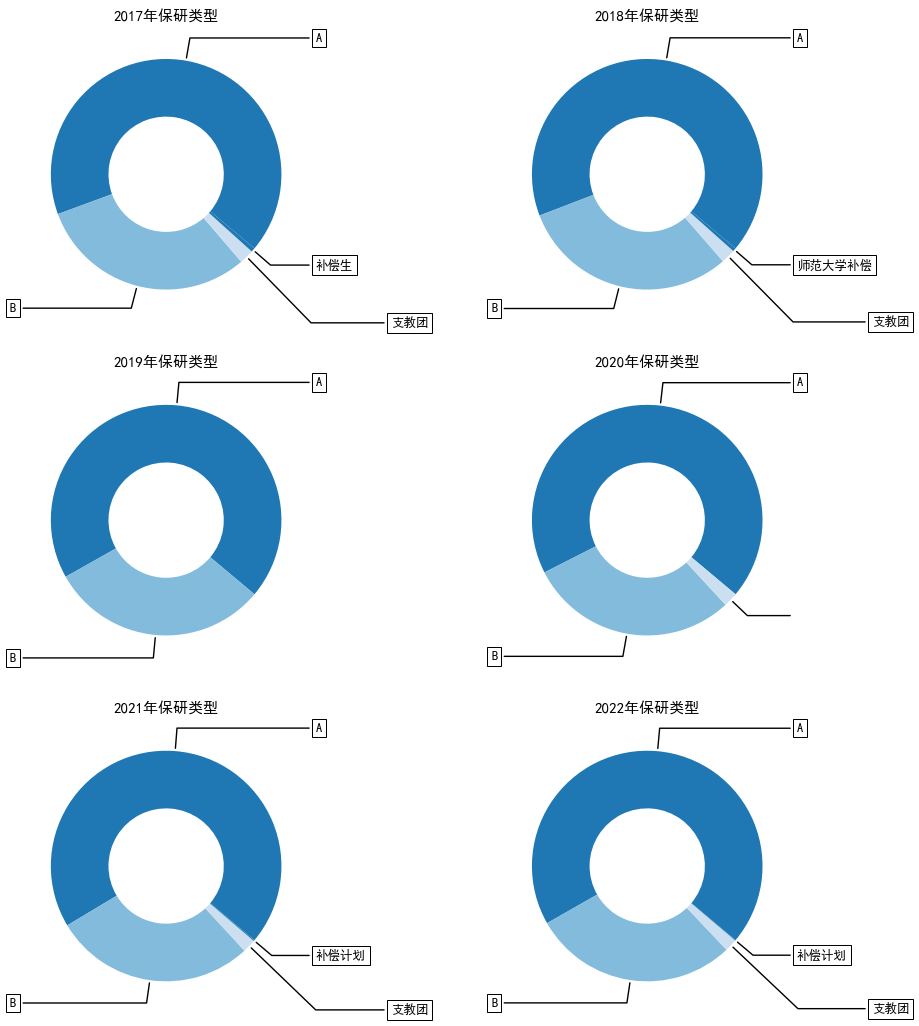

In [9]:
%matplotlib inline
prt.pie_img()
plt.savefig('pie.png', dpi = 500, bbox_inches = 'tight')
plt.show()

由图可见，保研类型有A保，B保，支教，补偿四种类型，大部分保研类型都是A保与B保为主，A保大致位于70%比例，B保位于30%比例，支教与补偿比例一直不高，在2019与2020几乎没有。


d:\Code\MathModel\Extra\Python数据分析\Code\whut_postgraduate_recommendation.py:68: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data_A_B, markers = 'o')


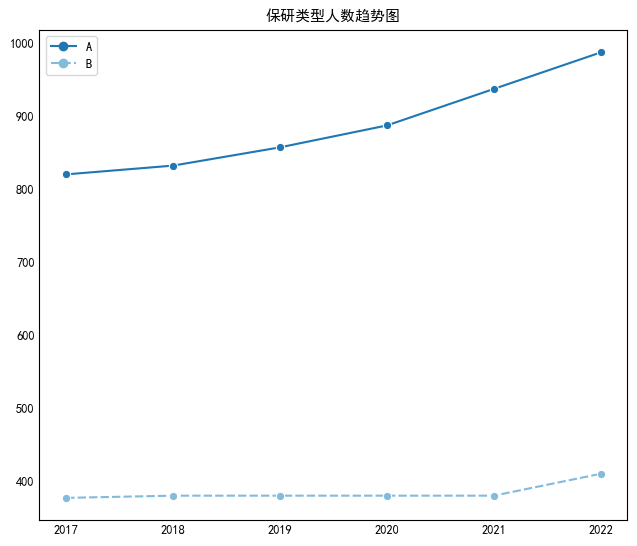

In [10]:
prt.line_img()
plt.savefig('line_img.png', dpi = 500, bbox_inches = 'tight')

有图可知，2017-2022年A保人数一直快速增长，而B保人数到2021-2022才有一定增长，说明大多同学还是比较热衷于A保，近几年B保才逐渐升高。
## 学院/班级比例(柱状图)

In [11]:
from whut_postgraduate_recommendation import postgraduate_recommendation_college
prc = postgraduate_recommendation_college(data)

### 学院比例

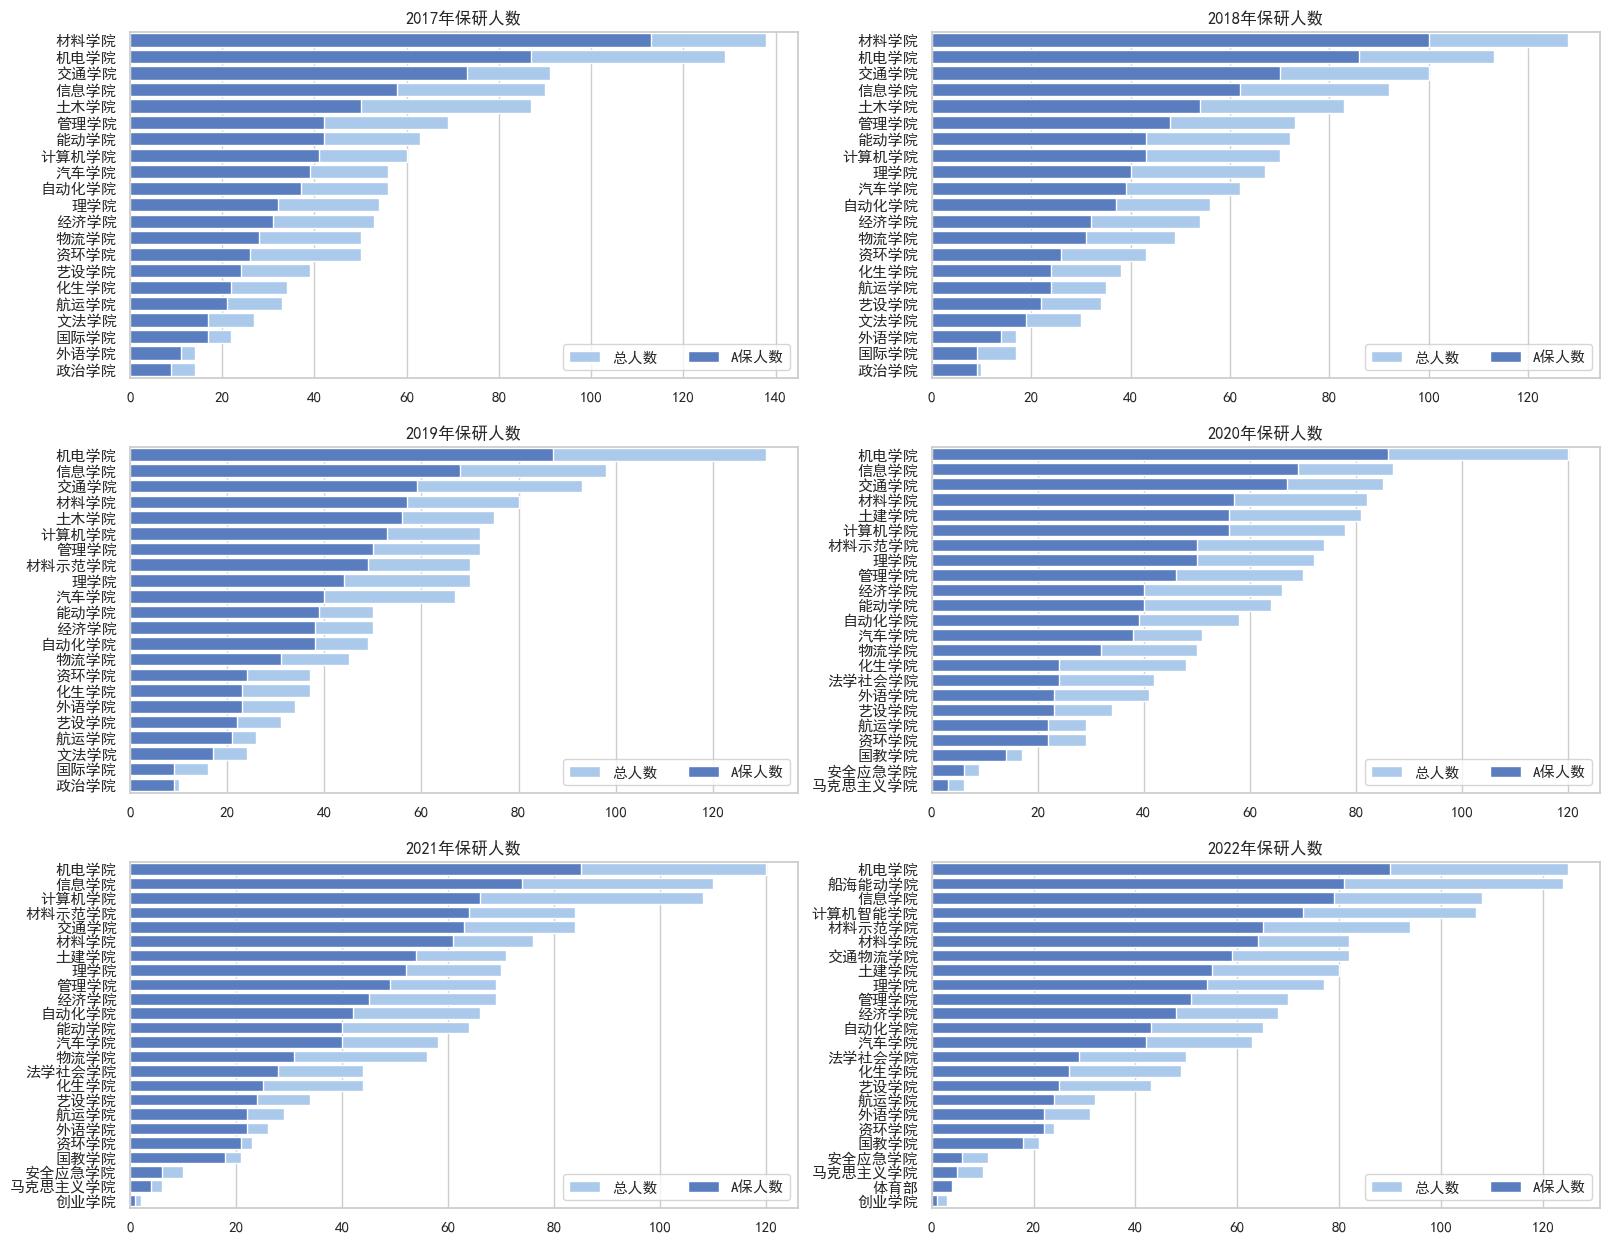

In [12]:
prc.bar_img('学院名称')
plt.savefig('bar_college.png', dpi = 500, bbox_inches = 'tight')

由图可见2017-2018年材料学院保研人数最多，而2019-2020机电学院保研人数最多，而到了2021与2022年信息与计算机学院保研人数最多，保研人数与行业发展态势与学校对学科的建设紧密相关，最近几年随着学校与国家对计算机与电信投入加大与该学院的同学的不断努力，保研人数逐渐增多。另外机电学院等理工科学院的保研人数在全校一直以来都位于前列，而马克思等文科学院保研人数则偏低，说明读理工科的同学保研意向更强烈。同时我们也可以注意到各个学院都是A保人数偏多，说明有保研意向的同学可以多注重个人绩点，再适当地参加一些学科竞赛。

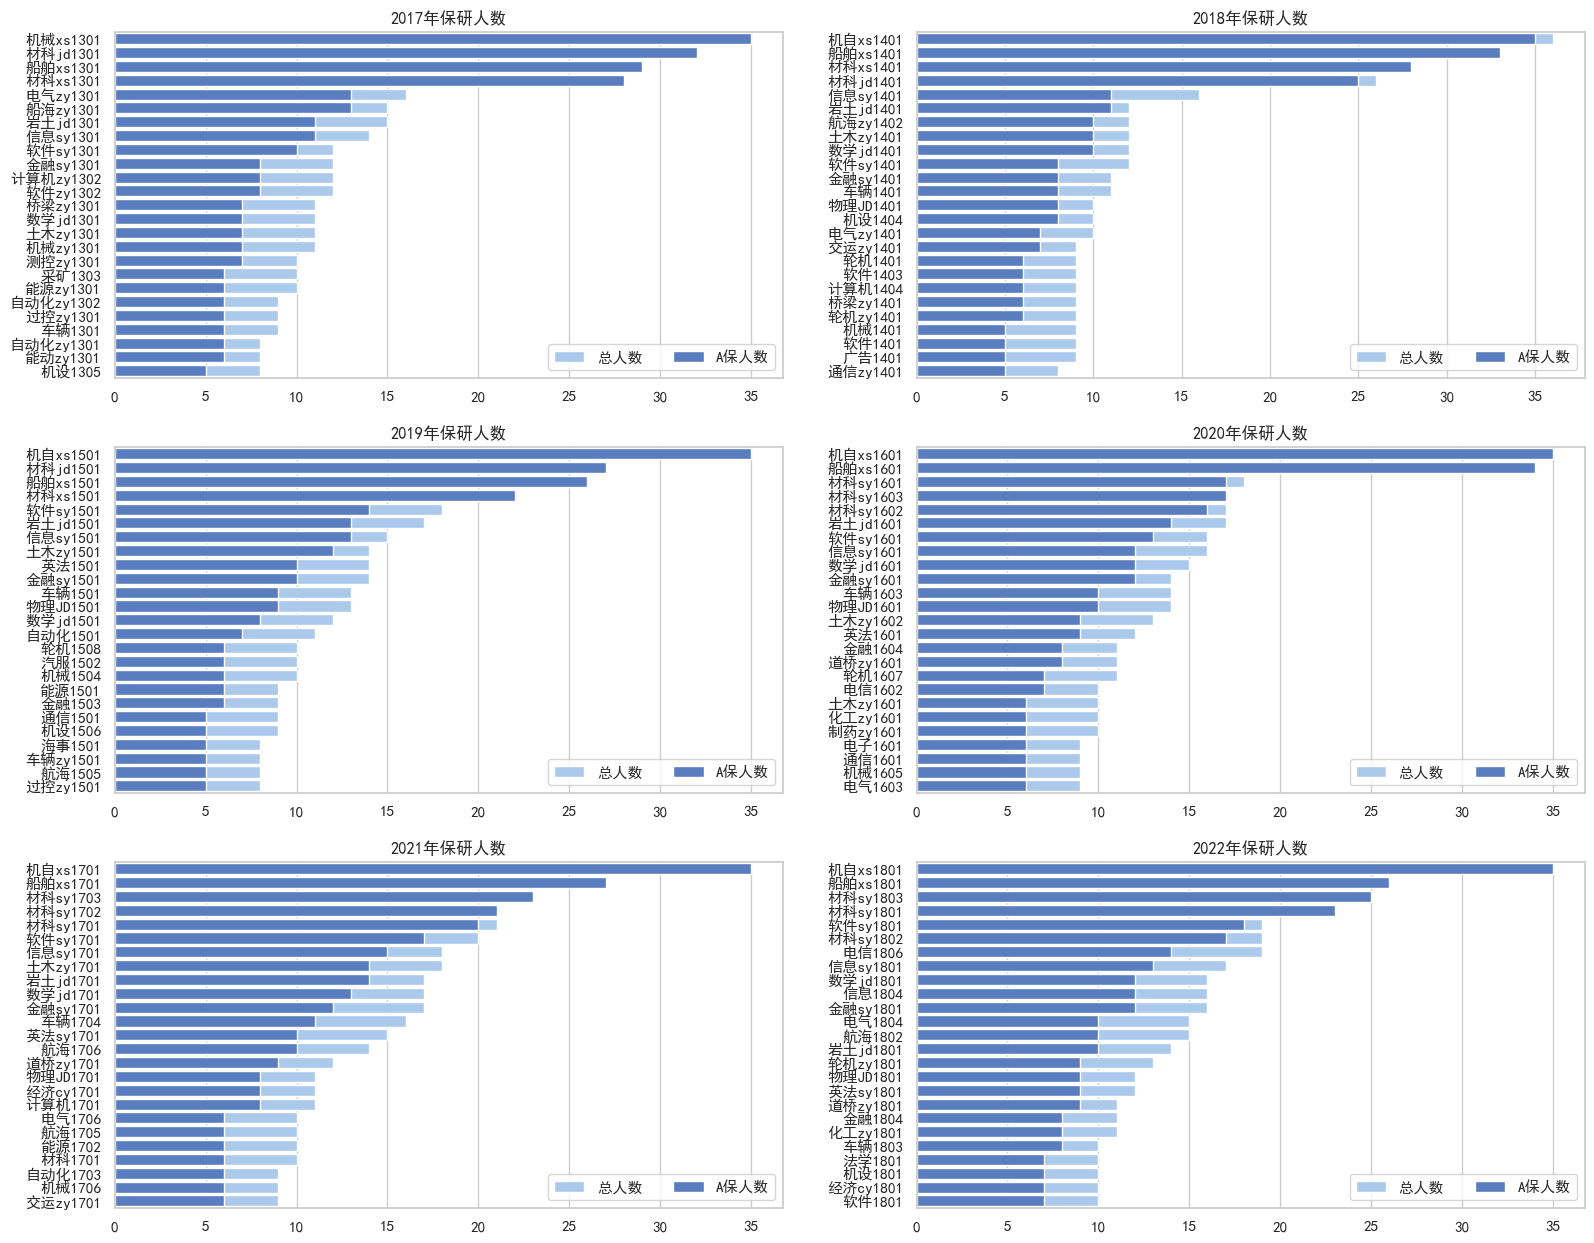

In [13]:
prc.bar_img('班级')
plt.savefig('bar_class.png', dpi = 500, bbox_inches = 'tight')

由图可知，大多保研班级带有xs,sy,jd之类标识，这类班级保研人数更多，保研人数最多的班级常年为机自，船舶，材料班级，而且A保人数众多，说明该班级学习氛围应该偏好，想保研的同学可以尝试报考这些班级。
## 保研人数趋势(折线图)
### 以往人数趋势
由于我校学院众多，存在学院沿革等现象，我们只研究计算机智能学院（原计算机学院），理学院，信息学院，机电学院，管理学院，材料学院，自动化学院，总保研人数趋势，

$RMSE=\sqrt{\frac{1}{N}\sum\limits_{i=1}^n(Y_i-f(x_i))^2}$

In [14]:
from whut_postgraduate_recommendation import postgraduate_recommendation_preson
prp = postgraduate_recommendation_preson(data)

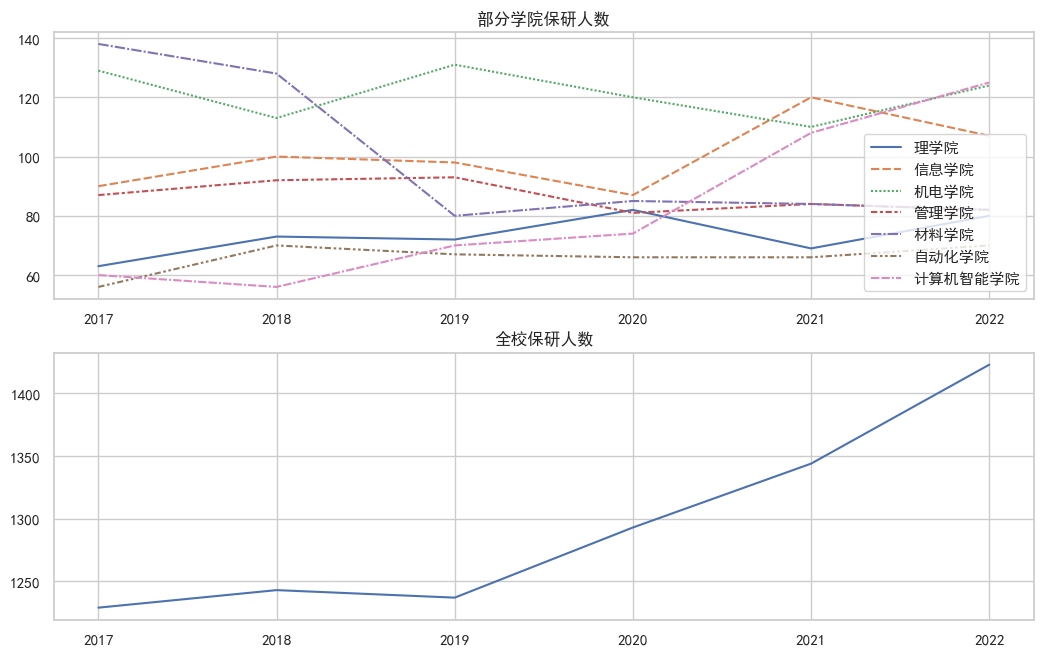

In [15]:
prp.line()
plt.savefig('line.png', dpi = 500, bbox_inches = 'tight')

由图一可见，所有学院内，材料学院的保研人数逐年下降，而计算机学院保研人数迅速增长，特别是最近几年，个人感觉这与人工智能的火热是密切相关的，人工智能需要更多的知识储备，这促进了计算机学生的读研热。信息学院与计算机学院在2020-2021年保研人数都快速增多，这也与近几年美国等的科技制裁与疫情期间电子信息技术快速发展密切相关，国家与学校重视对信息学科建设，同学也更加努力，保研人数快速提高。由此图二可见保研总人数逐年增长，这体现我校办学能力卓越，我校学子更加努力向保研拼搏。
### 预测两年保研人数
我们使用prophet算法进行预测

In [16]:
from whut_postgraduate_recommendation import postgraduate_recommendation_preson_predict
prpp = postgraduate_recommendation_preson_predict(data)

22:44:06 - cmdstanpy - INFO - Chain [1] start processing
22:44:11 - cmdstanpy - INFO - Chain [1] done processing


#### 模型评价

In [17]:
prpp.RMSE()

0.01891797072972932

RMSE值较小，拟合效果较好
#### 模型预测

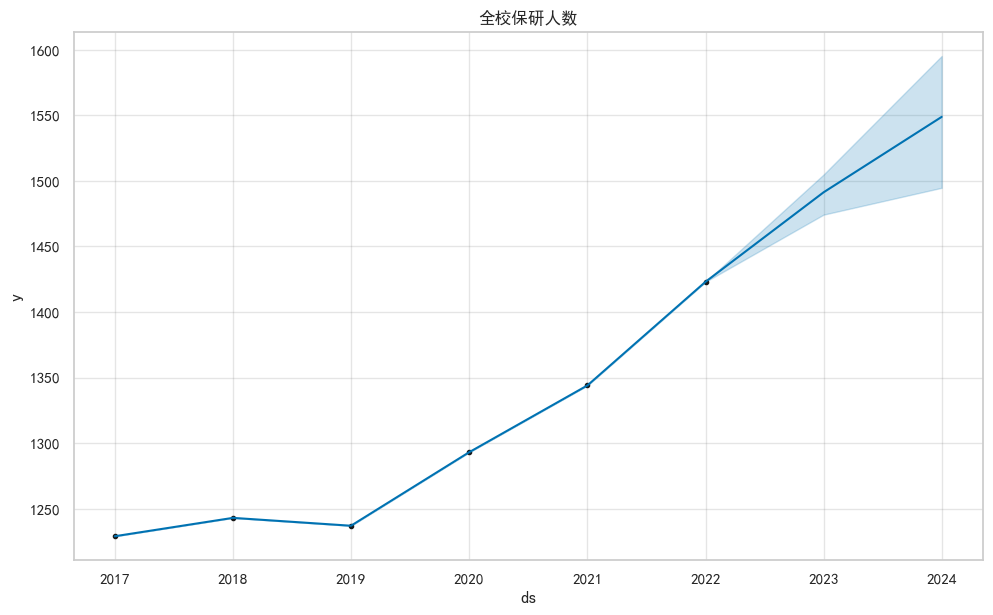

In [18]:
prpp.predict(range(2017, 2025))
plt.savefig('predict.png', dpi = 500, bbox_inches = 'tight')

## B保竞赛类型(词云图 + 柱状图)
选取2022年B保同学的数据与武汉理工大学本科生学科竞赛认定一览表，通过分析查看B保同学大多参加哪些比赛

In [19]:
from whut_postgraduate_recommendation import postgraduate_recommendation_B
prb = postgraduate_recommendation_B(contest_path='../Data/武汉理工大学本科生学科竞赛认定一览表.pdf', data_path='../Data/2022B.xlsx')

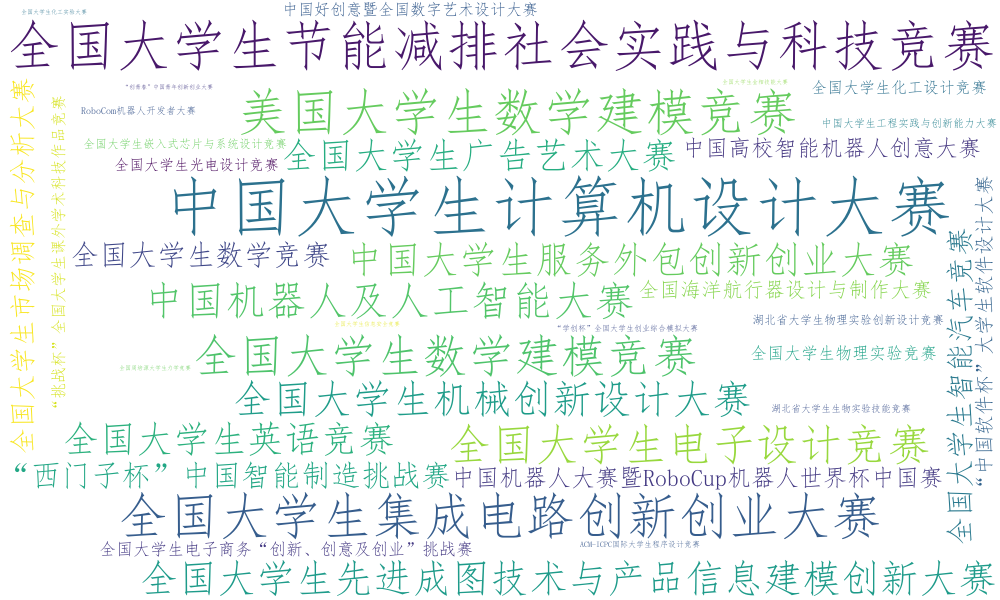

In [20]:
prb.wordcloud_img()

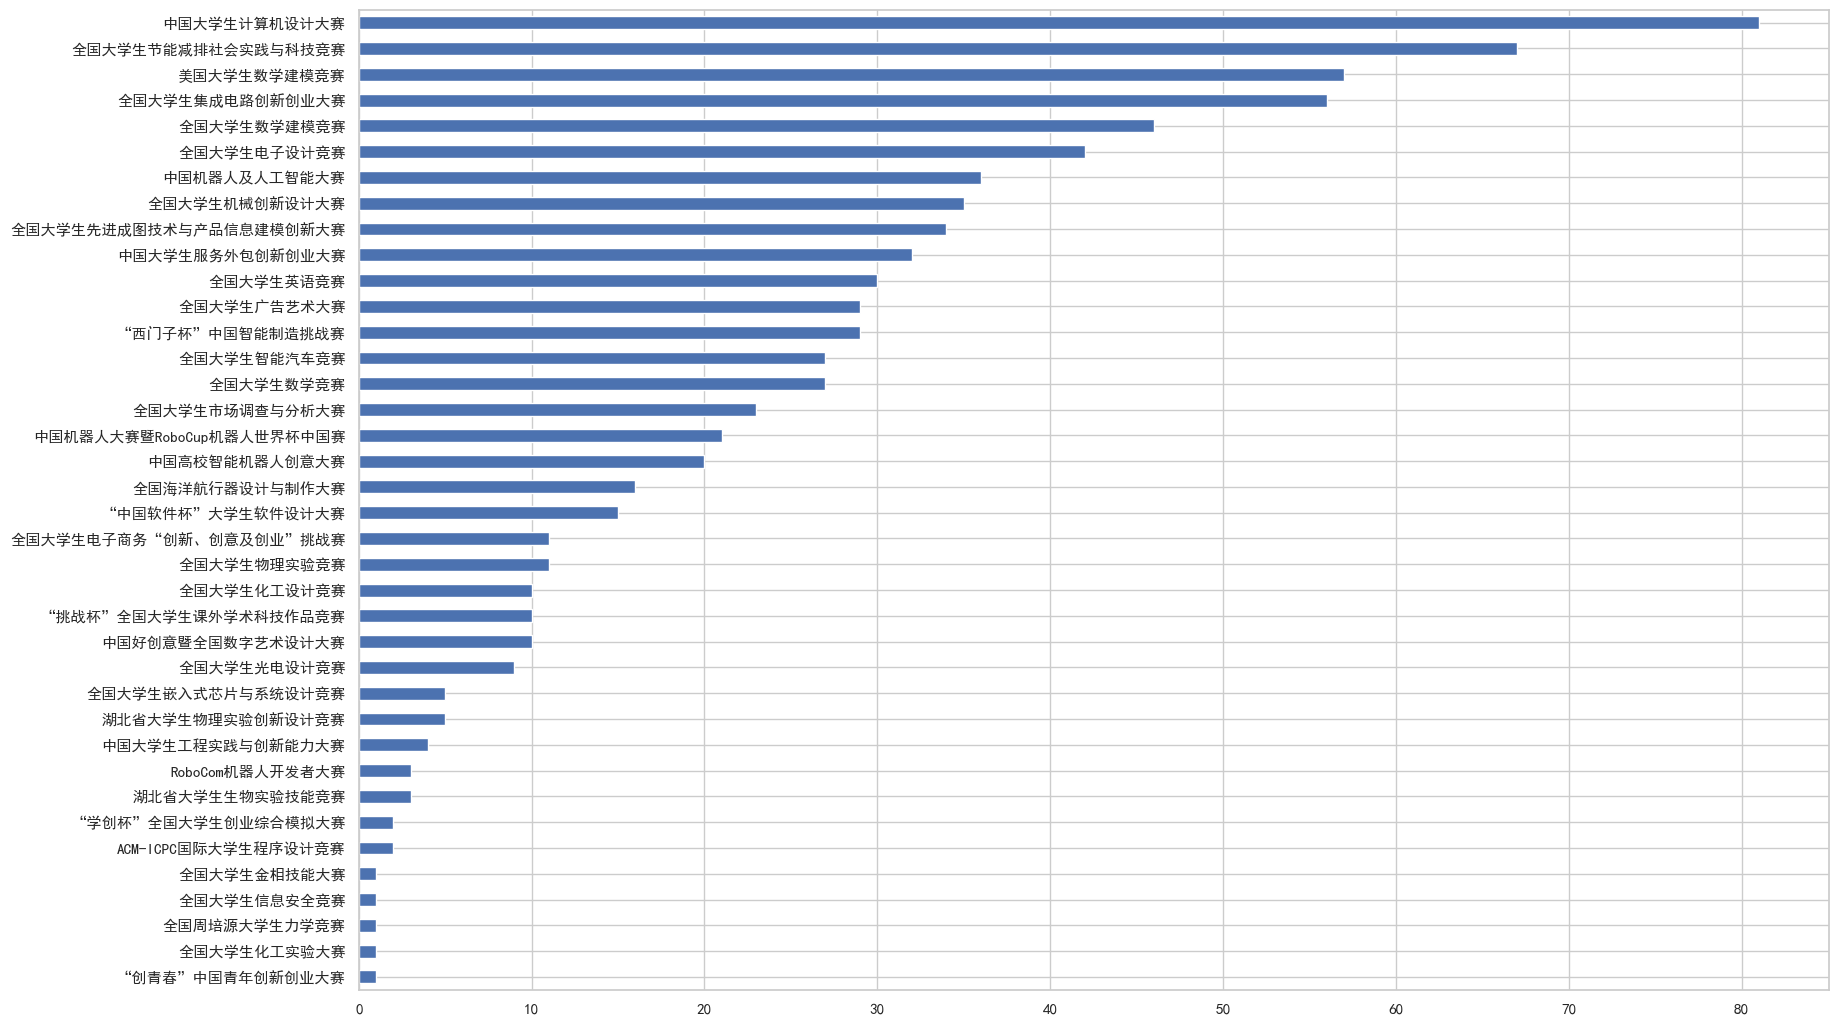

In [21]:
prb.bar_img()
plt.savefig('bar_img.png', dpi = 500, bbox_inches = 'tight')

由图可知，大多B保同学都参加中国大学生计算机设计大赛，全国大学生节能减排社会实践与科技竞赛，美国大学生数学建模竞赛等面向学生种类比较广的比赛，而专业性较强的比赛参加学生较少，想要走B保的同学可以在以后多多参加中国大学生计算机设计大赛等比赛，丰富自己的知识，提高自己的能力